## __Clustering__

> __Rationale for Data Preparation:__ Clustering on the raw dataset is not meaningful because the records are day-wise, and multiple records belong to the same city. Performing clustering on day-level entries would incorrectly group individual days rather than the underlying city characteristics.
To address this, we created a pivoted dataset that contains the average values of all relevant variables for each city. This aggregated city-level dataset provides a more stable and interpretable basis for clustering.
>
> __Clustering Approach:__ We will perform clustering on the aggregated city-level data and determine the optimal number of clusters using:
Elbow Method, and/or
Silhouette Score
This ensures the chosen value of k provides meaningful and well-separated clusters.

In [4]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Visual Python: Data Analysis > File
df = pd.read_excel('./forclustering.xlsx')
df.head()

,Row Labels,Average of precipitation_mm,Average of cloud_cover,Average of wind_speed,Average of pressure,Average of humidity,Average of temp_avg,Average of nh3,Average of pm10,Average of pm2_5,Average of so2,Average of o3,Average of no2,Average of no,Average of co,Average of aqi
0,Agra,0.672324,37.262842,8.141505,1008.161189,63.556084,25.231494,11.928586,113.150058,91.356494,12.627804,68.841546,18.247704,1.529985,871.729381,3.829805
1,Ahmedabad,0.786957,38.664385,9.697973,1008.278862,55.145564,27.932570,10.766761,78.176352,56.918339,24.134551,54.364483,21.167837,4.881929,756.519387,3.274596
2,Allahabad,0.729114,40.474618,8.134434,1007.764429,65.099908,26.155076,16.535422,111.256018,93.393298,14.033153,71.375073,15.416326,0.934507,869.604555,3.853749
3,Amritsar,0.641143,32.484277,6.919465,1008.619655,68.320052,23.185885,24.280899,149.561292,120.911053,9.767383,74.813877,19.782981,2.082924,1202.230169,4.263167
4,Bangalore,0.689342,70.343175,12.049686,1011.593631,69.000672,23.657244,3.658211,25.922913,21.848693,6.529540,49.177801,14.974387,3.116439,511.519962,2.141116


> since we are clustering the cities based on the pollution levels.. lets only consider them for the analysis and remove the weather variables by creating a subset of the dataset

In [25]:
# Visual Python: Data Analysis > Subset
cl_df = df.loc[:, ['Average of nh3','Average of pm10','Average of pm2_5','Average of so2','Average of o3','Average of no2','Average of no','Average of co','Average of aqi']]
cl_df.head()

,Average of nh3,Average of pm10,Average of pm2_5,Average of so2,Average of o3,Average of no2,Average of no,Average of co,Average of aqi
0,11.928586,113.150058,91.356494,12.627804,68.841546,18.247704,1.529985,871.729381,3.829805
1,10.766761,78.176352,56.918339,24.134551,54.364483,21.167837,4.881929,756.519387,3.274596
2,16.535422,111.256018,93.393298,14.033153,71.375073,15.416326,0.934507,869.604555,3.853749
3,24.280899,149.561292,120.911053,9.767383,74.813877,19.782981,2.082924,1202.230169,4.263167
4,3.658211,25.922913,21.848693,6.529540,49.177801,14.974387,3.116439,511.519962,2.141116


In [32]:
## finding the optimal k using elbow method

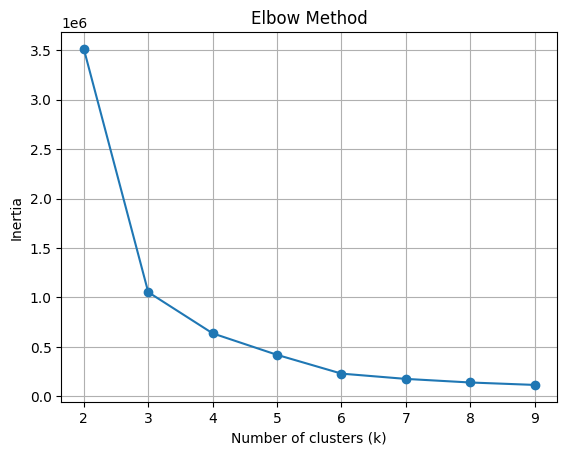

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X = your data (numpy array or df.values)

inertias = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init='auto')
    kmeans.fit(cl_df)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [40]:
## optimal K using silhouette method

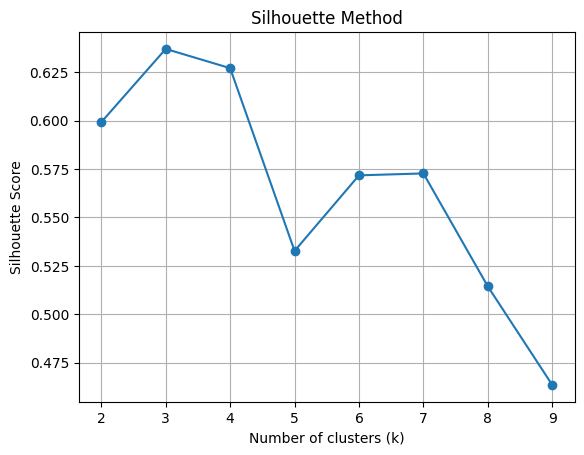

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []
K = range(2, 10)   # silhouette starts from k=2

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init='auto')
    labels = kmeans.fit_predict(cl_df)
    score = silhouette_score(cl_df, labels)
    sil_scores.append(score)

plt.plot(K, sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()


> __Elbow Method Insight:__ The inertia drops sharply from k = 2 → 3, and then the curve starts flattening after k = 3, indicating diminishing returns in variance explained.
> This “elbow” at k = 3 suggests that adding further clusters does not significantly improve compactness.


>__Silhouette Method Insight:__ The silhouette score reaches its highest value at k = 3 (~0.64), meaning clusters are well-separated and internally cohesive at this point.
Although k = 4 is close, k = 3 still provides the best overall structural separation.

In [46]:
## lets perform clustering

In [81]:
# Visual Python: Machine Learning > Pipeline
# [1] Clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)

# [2] Fit
model.fit(cl_df)

# [3] Predict
clust = model.predict(cl_df)

In [86]:
## adding the cluster numbers to the original dataset

In [94]:
df['cluster'] = clust
df.head()

,Row Labels,Average of precipitation_mm,Average of cloud_cover,Average of wind_speed,Average of pressure,Average of humidity,Average of temp_avg,Average of nh3,Average of pm10,Average of pm2_5,Average of so2,Average of o3,Average of no2,Average of no,Average of co,Average of aqi,cluster
0,Agra,0.672324,37.262842,8.141505,1008.161189,63.556084,25.231494,11.928586,113.150058,91.356494,12.627804,68.841546,18.247704,1.529985,871.729381,3.829805,2
1,Ahmedabad,0.786957,38.664385,9.697973,1008.278862,55.145564,27.932570,10.766761,78.176352,56.918339,24.134551,54.364483,21.167837,4.881929,756.519387,3.274596,2
2,Allahabad,0.729114,40.474618,8.134434,1007.764429,65.099908,26.155076,16.535422,111.256018,93.393298,14.033153,71.375073,15.416326,0.934507,869.604555,3.853749,2
3,Amritsar,0.641143,32.484277,6.919465,1008.619655,68.320052,23.185885,24.280899,149.561292,120.911053,9.767383,74.813877,19.782981,2.082924,1202.230169,4.263167,2
4,Bangalore,0.689342,70.343175,12.049686,1011.593631,69.000672,23.657244,3.658211,25.922913,21.848693,6.529540,49.177801,14.974387,3.116439,511.519962,2.141116,0


In [92]:
df.to_excel('cluster.xlsx')

In [225]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters (k=2 to 9) as used in your notebook
K = range(2, 10)
metrics_data = []

print("Calculating metrics for tabulation...")

for k in K:
    # Initialize and fit the model using the same parameters as your notebook
    kmeans = KMeans(n_clusters=k, random_state=123, n_init='auto')
    kmeans.fit(cl_df) # Uses the 'cl_df' subset defined in your previous cells
    
    # Get Inertia (Elbow)
    inertia = kmeans.inertia_
    
    # Get Silhouette Score
    labels = kmeans.labels_
    sil_score = silhouette_score(cl_df, labels)
    
    # Append to list
    metrics_data.append({
        'k (Clusters)': k,
        'Inertia (Elbow)': inertia,
        'Silhouette Score': sil_score
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print("\nCluster Metrics Table:")
display(metrics_df)

Calculating metrics for tabulation...

Cluster Metrics Table:


,k (Clusters),Inertia (Elbow),Silhouette Score
0,2,3.512489e+06,0.599208
1,3,1.053168e+06,0.636993
2,4,6.368162e+05,0.627057
3,5,4.194994e+05,0.532711
4,6,2.296091e+05,0.571725
5,7,1.762823e+05,0.572721
6,8,1.399608e+05,0.514393
7,9,1.154215e+05,0.463536
